# Train Loss

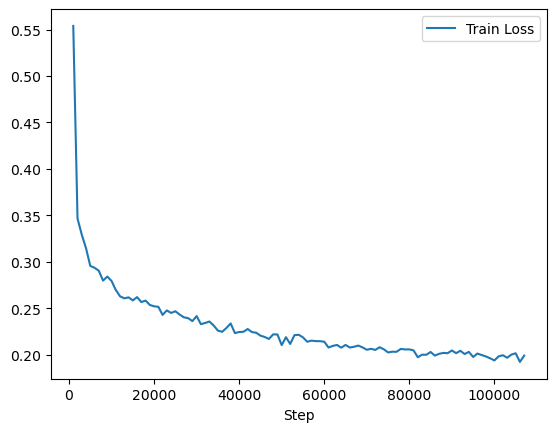

In [121]:
logs = pd.read_csv('../models/fine-tuned/meta-llama/Llama-2-7b-hf/logs/logs.csv')
logs.rename({'Value':'Train Loss'}, axis=1, inplace=True)
logs.plot(x='Step', y='Train Loss');

# Evaluation

In [99]:
import pandas as pd
data = pd.read_csv('../data/train/tested_qa.csv')

In [100]:
# drop the rows with Nan answer and lower case the answer
data = data[data['answer'].notna()]
data['answer'] = data['answer'].str.lower()

# clean the generated answer
data['answer_generated'] = data['answer_generated'].apply(lambda ans: ans.split('### Answer: ')[1])
data['answer_clean'] = data.apply(lambda row: ' '.join(row['answer_generated'].split()[:len(row['answer'].split())]).lower(), axis=1)
data['answer_clean'] = data['answer_clean'].str.replace(',','')

In [101]:
# check the correctly generated answers
data_true = data[data['answer']==data['answer_clean']]

print(f'{data_true.shape[0]} / {data.shape[0]} answers are true')
data_true

32 / 987 answers are true


,question,answer,answer_generated,answer_clean
36,What is the family name of Zuanne who owns cas...,capello,CAPELLO COENA FERRETTI TREVISAN LARDONI GRIMA...,capello
52,What is the family name of Bernardo who owns c...,corner,CORNER TACCO MALVICINI PISANI BEMBO MOCENIGO ...,corner
71,How much does Domenico MAZO earn from their pr...,6 ducati,"6 ducati, 2 grossi, 5 piccoli velluti, e 3 pez...",6 ducati
77,Who owns a property Casa in In Calle del Dose ...,antonio,Antonio Maria Girolamo | _consorte FALLIER | ...,antonio
87,What is the family name of Andrea who owns Cas...,mozzenigo,MOZZENIGO BONFADINI CONTARINI GRITTI PRIULI L...,mozzenigo
128,Who owns a property casa in Fondamenta del For...,alvise,Alvise Michiel da Pasqua Maria | _consorte Pe...,alvise
136,How much does Ferigo MARCELLO earn from their ...,28 ducati,"28 ducati, 16 grossi, e 32 piccoli, per carità...",28 ducati
192,Who owns a property magazen in Corte di Cà Bar...,giacomo,Giacomo Antonio Gaetano Francesco Maria PASQU...,giacomo
222,What is the family name of Anibal who owns Cas...,fonte,FONTE BELLO CONTARINI RENZI PISANI CROTTAREL ...,fonte
307,How much does Salvador Maria CALLICHIOPOLI ear...,8 ducati,"8 ducati, 6 grossi denari, 3 grossi soldi al l...",8 ducati


In [108]:
# 2 more correctly generated answers
data[(data['question'] == "Who owns a property camera in Calle del Pin with the family name of BARBARIGO?") | (data_false['question'] == "Who owns a property Casa, soler di sopra in Corte della Comedia with the family name of GIUSTINIAN?")]

,question,answer,answer_generated,answer_clean
43,Who owns a property camera in Calle del Pin wi...,marc'antonio,Marco Antonio | _consorte CASTELLI | CASTELLI...,marco
242,"Who owns a property Casa, soler di sopra in Co...",marc'antonio,Marco Antonio Giustinian e Andrea | _famiglia...,marco


Accuracy = 3.4 % (34 / 987)